In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split


In [2]:
path = 'California_Fire_Incidents.xlsx'
fire = pd.read_excel(path)
columns = ['AcresBurned', 'AirTankers', 'AdminUnit', 'Counties', 'CountyIds', 'Engines', 'Latitude', 'Longitude', 'Started']

In [3]:
fire_df = fire[columns]
print(len(fire_df))
fire_df.head()

1636


,AcresBurned,AirTankers,AdminUnit,Counties,CountyIds,Engines,Latitude,Longitude,Started
0,257314.0,NaN,Stanislaus National Forest/Yosemite National Park,Tuolumne,55,NaN,37.857000,-120.086000,2013-08-17T15:25:00Z
1,30274.0,NaN,USFS Angeles National Forest/Los Angeles Count...,Los Angeles,19,NaN,34.585595,-118.423176,2013-05-30T15:28:00Z
2,27531.0,NaN,CAL FIRE Riverside Unit / San Bernardino Natio...,Riverside,33,NaN,33.709500,-116.728850,2013-07-15T13:43:00Z
3,27440.0,NaN,Tahoe National Forest,Placer,31,NaN,39.120000,-120.650000,2013-08-10T16:30:00Z
4,24251.0,NaN,Ventura County Fire/CAL FIRE,Ventura,56,117.0,0.000000,0.000000,2013-05-02T07:01:00Z


In [4]:
fire_df.isna().sum()

AcresBurned       3
AirTankers     1608
AdminUnit         0
Counties          0
CountyIds         0
Engines        1445
Latitude          0
Longitude         0
Started           0
dtype: int64

In [5]:
fire_df = fire_df.drop(['AirTankers', 'Engines', 'AdminUnit'], axis=1)
fire_df = fire_df.dropna()
fire_df = fire_df[fire_df['Latitude'] != float(0)]
fire_df = fire_df[fire_df['Longitude'] != float(0)]
fire_df = fire_df[fire_df['Counties'] != 'State of Nevada']
fire_df = fire_df[fire_df['Counties'] != 'State of Oregon']
fire_df = fire_df[fire_df['Counties'] != 'Mexico']
len(fire_df)
#fire_df.to_csv('cleaned_fire.csv')

1475

In [6]:
fire_df.tail()


,AcresBurned,Counties,CountyIds,Latitude,Longitude,Started
1628,10.0,Butte,4,39.423833,-121.579738,2019-07-23T14:41:00Z
1629,10.0,Siskiyou,47,41.946220,-122.401570,2019-06-16T20:33:00Z
1630,10.0,Butte,4,39.839580,-121.957000,2019-04-30T12:20:00Z
1631,9.0,Riverside,33,33.827979,-117.499619,2019-10-10T12:08:00Z
1632,2.0,Nevada,29,39.409722,-121.000556,2019-06-28T15:03:04Z


In [7]:
fire_df.dtypes

AcresBurned    float64
Counties        object
CountyIds       object
Latitude       float64
Longitude      float64
Started         object
dtype: object

In [8]:
months = []
years = []
for index, row in fire_df.iterrows():
   #print(date)
    month = row['Started'].split('-')[1]
    year = row['Started'].split('-')[0]
    months.append(np.float32(month))
    years.append(np.float32(year))

In [9]:
fire_df = fire_df.drop('Started', axis=1)
fire_df['Month'] = months
fire_df['Year'] = years
print(len(fire_df))
fire_df.head()
#fire_df.to_csv('Wildfires 2013-2019.csv')

1475


,AcresBurned,Counties,CountyIds,Latitude,Longitude,Month,Year
0,257314.0,Tuolumne,55,37.857000,-120.086000,8.0,2013.0
1,30274.0,Los Angeles,19,34.585595,-118.423176,5.0,2013.0
2,27531.0,Riverside,33,33.709500,-116.728850,7.0,2013.0
3,27440.0,Placer,31,39.120000,-120.650000,8.0,2013.0
5,22992.0,Fresno,10,37.279000,-119.318000,7.0,2013.0


In [10]:
labels = fire_df['Counties']
features = fire_df.drop(['Counties', 'CountyIds'], axis=1)
features.head()

,AcresBurned,Latitude,Longitude,Month,Year
0,257314.0,37.857000,-120.086000,8.0,2013.0
1,30274.0,34.585595,-118.423176,5.0,2013.0
2,27531.0,33.709500,-116.728850,7.0,2013.0
3,27440.0,39.120000,-120.650000,8.0,2013.0
5,22992.0,37.279000,-119.318000,7.0,2013.0


In [11]:
dummies = pd.get_dummies(labels)
county_names = dummies.columns
#print(county_names)
one_hot_labels = dummies.to_numpy()
scaler = MinMaxScaler()
#acres = features['AcresBurned'].to_numpy().reshape(-1,1)
scaled = scaler.fit_transform(features)
one_hot_labels[0]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0], dtype=uint8)

In [12]:
print(features.shape)
one_hot_labels.shape

(1475, 5)


(1475, 56)

In [13]:
X_train, X_test, y_train, y_test = train_test_split(scaled, one_hot_labels, test_size=0.2)

## Cleaned and Combined Dataset

In [14]:
climate = pd.read_csv('wildfire-temperature-rainfall.csv')
climate = climate.drop(['MeasurementID', 'LocationID', 'UniqueID'], axis=1)
climate = climate[climate['Location'] != 'Imperial']
climate = climate[climate['Location'] != 'San Francisco']
climate_labels = climate['Location']
print(climate_labels.nunique())
climate.head()


56


,AcresBurned,Latitude,Longitude,Month,Year,Location,Rainfall,MinTemp,MaxTemp,AvgTemp
0,38,37.742410,-121.862160,7,2013,Alameda,5.08,48.2,70.8,59.5
1,240,37.775057,-121.737213,6,2013,Alameda,5.08,48.2,70.8,59.5
2,50,37.739300,-121.586900,7,2013,Alameda,5.08,48.2,70.8,59.5
3,96,38.277830,-120.966016,6,2013,Amador,12.25,46.2,72.1,59.1
4,305,39.439000,-121.497000,10,2013,Butte,12.19,46.8,74.1,60.4


In [15]:
features = climate.drop('Location', axis=1)
labels = climate['Location']

In [16]:
dummies = pd.get_dummies(labels)
county_names = dummies.columns
#print(county_names)
one_hot_labels = dummies.to_numpy()
scaler = StandardScaler()
#acres = features['AcresBurned'].to_numpy().reshape(-1,1)
scaled = scaler.fit_transform(features)
one_hot_labels[0]

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=uint8)

In [17]:
scaled

array([[-0.16515557, -0.02341558, -0.1953067 , ...,  0.14943118,
        -0.2566135 , -0.05711901],
       [-0.15809617, -0.02318713, -0.18535571, ...,  0.14943118,
        -0.2566135 , -0.05711901],
       [-0.1647362 , -0.02343734, -0.17338453, ...,  0.14943118,
        -0.2566135 , -0.05711901],
       ...,
       [-0.16403725, -0.01352079, -0.17153126, ...,  0.25889209,
         0.11528025,  0.19821298],
       [-0.16515557, -0.01419082, -0.15452855, ...,  0.25889209,
         0.11528025,  0.19821298],
       [-0.16368777, -0.0128884 , -0.15244592, ...,  0.25889209,
         0.11528025,  0.19821298]])

In [18]:
X_train, X_test, y_train, y_test = train_test_split(scaled, one_hot_labels, test_size=0.2)

## Model


In [19]:
import sys
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

import tensorflow as tf
from tensorflow.keras import layers, Sequential, Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Model
from tensorflow.keras.layers.experimental import preprocessing


def build_dnn():

    
    normalizer = layers.BatchNormalization(momentum=0.98, epsilon=.001, trainable=True)

    model = Sequential([

        #normalizer,
        layers.Dense(24, activation='relu'),
        layers.Dense(16, activation='relu'),
        layers.Dense(8, activation='relu'),
        layers.Dense(1)
    ])
    model = Model([img_input, num_input], out)
    model.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(0.0001), metrics=['accuracy'])
    print("Model compiled")
    return model

In [20]:
def merged_build_dnn(fire_shape, climate_shape, numclasses):
    fire_input = Input(shape=fire_shape)
    model1 = Dense(64, activation='relu')(fire_input)
    model1 = Dense(16, activation='relu')(model1)
    #model1 = Dense(4, activation='relu')(model1)
    
    output1 = Dense(4, activation='relu')(model1)
    
    climate_input = Input(shape=climate_shape)
    model2 = Dense(16, activation='relu')(climate_input)
    #model2 = Dense(16, activation='relu')(model2)
    output2 = Dense(4, activation='relu')(model2)
    
    merged_model = concatenate([output1, output2])
    
    dp1 = Dense(4, activation='relu')(merged_model)
    output = Dense(1, activation='sigmoid')(dp1)

    model = Model(inputs=[fire_input, climate_input], outputs=output)
    print(model.summary())
    return(model)

In [21]:
def build_dnn(input_shape, numclasses):
    feature_input = Input(shape=input_shape)
    model = Dense(512, activation='relu')(feature_input)
    model = Dense(256, activation='relu')(model)
    model = Dense(128, activation='relu')(model)
    model = Dense(64, activation='relu')(model)
    model = Dense(64, activation='relu')(model)
    model = Dense(16, activation='relu')(model)
    output = Dense(numclasses, activation='softmax')(model)
    model = Model(inputs=feature_input, outputs=output)
    print(model.summary())
    return(model)

In [22]:
model = build_dnn((9,), len(one_hot_labels[0]))

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 9)]               0         
_________________________________________________________________
dense (Dense)                (None, 512)               5120      
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_2 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_3 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_4 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_5 (Dense)              (None, 16)                1040  

In [23]:
model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(0.0001), metrics=['accuracy'])

history = model.fit(X_train, y_train, validation_split=0.2, epochs=400)
model.evaluate(X_test, y_test, verbose=1)


Epoch 1/400
30/30 [==============================] - 1s 19ms/step - loss: 4.0241 - accuracy: 0.0097 - val_loss: 4.0224 - val_accuracy: 0.0129
Epoch 2/400
30/30 [==============================] - 0s 5ms/step - loss: 4.0118 - accuracy: 0.0140 - val_loss: 4.0154 - val_accuracy: 0.0172
Epoch 3/400
30/30 [==============================] - 0s 3ms/step - loss: 3.9965 - accuracy: 0.0172 - val_loss: 4.0003 - val_accuracy: 0.0172
Epoch 4/400
30/30 [==============================] - 0s 3ms/step - loss: 3.9704 - accuracy: 0.0258 - val_loss: 3.9738 - val_accuracy: 0.0258
Epoch 5/400
30/30 [==============================] - 0s 3ms/step - loss: 3.9277 - accuracy: 0.0311 - val_loss: 3.9315 - val_accuracy: 0.0300
Epoch 6/400
30/30 [==============================] - 0s 4ms/step - loss: 3.8570 - accuracy: 0.0516 - val_loss: 3.8688 - val_accuracy: 0.0472
Epoch 7/400
30/30 [==============================] - 0s 5ms/step - loss: 3.7726 - accuracy: 0.0569 - val_loss: 3.7926 - val_accuracy: 0.0343
Epoch 8/400


Epoch 59/400
30/30 [==============================] - 0s 6ms/step - loss: 1.3184 - accuracy: 0.6488 - val_loss: 1.9890 - val_accuracy: 0.5107
Epoch 60/400
30/30 [==============================] - 0s 6ms/step - loss: 1.2964 - accuracy: 0.6498 - val_loss: 1.9806 - val_accuracy: 0.5193
Epoch 61/400
30/30 [==============================] - 0s 6ms/step - loss: 1.2722 - accuracy: 0.6488 - val_loss: 1.9850 - val_accuracy: 0.5193
Epoch 62/400
30/30 [==============================] - 0s 11ms/step - loss: 1.2518 - accuracy: 0.6574 - val_loss: 1.9590 - val_accuracy: 0.5279
Epoch 63/400
30/30 [==============================] - 0s 11ms/step - loss: 1.2431 - accuracy: 0.6531 - val_loss: 1.9722 - val_accuracy: 0.5451
Epoch 64/400
30/30 [==============================] - 0s 10ms/step - loss: 1.2171 - accuracy: 0.6745 - val_loss: 1.9483 - val_accuracy: 0.5365
Epoch 65/400
30/30 [==============================] - 0s 5ms/step - loss: 1.1833 - accuracy: 0.6681 - val_loss: 1.9153 - val_accuracy: 0.5451
Epo

30/30 [==============================] - 0s 9ms/step - loss: 0.5137 - accuracy: 0.8571 - val_loss: 1.6038 - val_accuracy: 0.7339
Epoch 117/400
30/30 [==============================] - 0s 11ms/step - loss: 0.5212 - accuracy: 0.8475 - val_loss: 1.5963 - val_accuracy: 0.7210
Epoch 118/400
30/30 [==============================] - 0s 10ms/step - loss: 0.5115 - accuracy: 0.8539 - val_loss: 1.6093 - val_accuracy: 0.7511
Epoch 119/400
30/30 [==============================] - 0s 7ms/step - loss: 0.4977 - accuracy: 0.8453 - val_loss: 1.6014 - val_accuracy: 0.7425
Epoch 120/400
30/30 [==============================] - 0s 11ms/step - loss: 0.4927 - accuracy: 0.8518 - val_loss: 1.6454 - val_accuracy: 0.7296
Epoch 121/400
30/30 [==============================] - 0s 7ms/step - loss: 0.4905 - accuracy: 0.8528 - val_loss: 1.5979 - val_accuracy: 0.7554
Epoch 122/400
30/30 [==============================] - 0s 6ms/step - loss: 0.4816 - accuracy: 0.8496 - val_loss: 1.5961 - val_accuracy: 0.7425
Epoch 123/

30/30 [==============================] - 0s 6ms/step - loss: 0.2591 - accuracy: 0.9194 - val_loss: 1.6889 - val_accuracy: 0.7897
Epoch 174/400
30/30 [==============================] - 0s 6ms/step - loss: 0.2500 - accuracy: 0.9205 - val_loss: 1.7050 - val_accuracy: 0.7940
Epoch 175/400
30/30 [==============================] - 0s 6ms/step - loss: 0.2448 - accuracy: 0.9334 - val_loss: 1.6970 - val_accuracy: 0.7940
Epoch 176/400
30/30 [==============================] - 0s 5ms/step - loss: 0.2605 - accuracy: 0.9184 - val_loss: 1.6829 - val_accuracy: 0.7897
Epoch 177/400
30/30 [==============================] - 0s 5ms/step - loss: 0.2406 - accuracy: 0.9366 - val_loss: 1.6791 - val_accuracy: 0.7725
Epoch 178/400
30/30 [==============================] - 0s 5ms/step - loss: 0.2457 - accuracy: 0.9216 - val_loss: 1.7110 - val_accuracy: 0.7811
Epoch 179/400
30/30 [==============================] - 0s 5ms/step - loss: 0.2458 - accuracy: 0.9302 - val_loss: 1.6983 - val_accuracy: 0.7897
Epoch 180/400

30/30 [==============================] - 0s 9ms/step - loss: 0.1286 - accuracy: 0.9667 - val_loss: 1.7745 - val_accuracy: 0.8283
Epoch 231/400
30/30 [==============================] - 0s 6ms/step - loss: 0.1257 - accuracy: 0.9742 - val_loss: 1.7632 - val_accuracy: 0.8369
Epoch 232/400
30/30 [==============================] - 0s 9ms/step - loss: 0.1209 - accuracy: 0.9764 - val_loss: 1.7591 - val_accuracy: 0.8283
Epoch 233/400
30/30 [==============================] - 0s 6ms/step - loss: 0.1153 - accuracy: 0.9742 - val_loss: 1.7808 - val_accuracy: 0.8455
Epoch 234/400
30/30 [==============================] - 0s 9ms/step - loss: 0.1131 - accuracy: 0.9753 - val_loss: 1.7948 - val_accuracy: 0.8498
Epoch 235/400
30/30 [==============================] - 0s 5ms/step - loss: 0.1114 - accuracy: 0.9764 - val_loss: 1.7667 - val_accuracy: 0.8240
Epoch 236/400
30/30 [==============================] - 0s 5ms/step - loss: 0.1247 - accuracy: 0.9689 - val_loss: 1.8049 - val_accuracy: 0.8412
Epoch 237/400

30/30 [==============================] - 0s 6ms/step - loss: 0.0648 - accuracy: 0.9914 - val_loss: 1.7316 - val_accuracy: 0.8498
Epoch 288/400
30/30 [==============================] - 0s 6ms/step - loss: 0.0716 - accuracy: 0.9871 - val_loss: 1.7731 - val_accuracy: 0.8412
Epoch 289/400
30/30 [==============================] - 0s 6ms/step - loss: 0.0604 - accuracy: 0.9903 - val_loss: 1.6679 - val_accuracy: 0.8498
Epoch 290/400
30/30 [==============================] - 0s 7ms/step - loss: 0.0644 - accuracy: 0.9871 - val_loss: 1.6882 - val_accuracy: 0.8541
Epoch 291/400
30/30 [==============================] - 0s 6ms/step - loss: 0.0618 - accuracy: 0.9860 - val_loss: 1.6905 - val_accuracy: 0.8584
Epoch 292/400
30/30 [==============================] - 0s 7ms/step - loss: 0.0572 - accuracy: 0.9893 - val_loss: 1.7208 - val_accuracy: 0.8498
Epoch 293/400
30/30 [==============================] - 0s 6ms/step - loss: 0.0655 - accuracy: 0.9828 - val_loss: 1.6630 - val_accuracy: 0.8412
Epoch 294/400

30/30 [==============================] - 0s 6ms/step - loss: 0.0344 - accuracy: 0.9946 - val_loss: 1.7923 - val_accuracy: 0.8584
Epoch 345/400
30/30 [==============================] - 0s 7ms/step - loss: 0.0398 - accuracy: 0.9914 - val_loss: 1.7703 - val_accuracy: 0.8541
Epoch 346/400
30/30 [==============================] - 0s 12ms/step - loss: 0.0410 - accuracy: 0.9893 - val_loss: 1.8109 - val_accuracy: 0.8541
Epoch 347/400
30/30 [==============================] - 0s 7ms/step - loss: 0.0341 - accuracy: 0.9914 - val_loss: 1.8065 - val_accuracy: 0.8627
Epoch 348/400
30/30 [==============================] - 0s 6ms/step - loss: 0.0389 - accuracy: 0.9903 - val_loss: 1.7844 - val_accuracy: 0.8627
Epoch 349/400
30/30 [==============================] - 0s 6ms/step - loss: 0.0386 - accuracy: 0.9914 - val_loss: 1.8035 - val_accuracy: 0.8412
Epoch 350/400
30/30 [==============================] - 0s 8ms/step - loss: 0.0455 - accuracy: 0.9882 - val_loss: 1.7912 - val_accuracy: 0.8498
Epoch 351/40

10/10 [==============================] - 0s 2ms/step - loss: 0.7902 - accuracy: 0.8733


[0.7902185916900635, 0.8732876777648926]

In [24]:
truth = y_test.argmax(axis=1) #.argmax(axis=1)

def get_names(data):
    county_labels = []
    for i in np.arange(len(data)):
        county = county_names[data[i]]
        county_labels.append(county)
    return county_labels
#print(county_labels)
truth_labels = get_names(truth)

predic = model.predict(X_test)
predic = predic.argmax(axis=1)
predic_labels = get_names(predic)
print(truth_labels)
print(predic_labels)

['Shasta', 'Tulare', 'San Diego', 'Amador', 'Lake', 'San Bernardino', 'Butte', 'Madera', 'Nevada', 'Butte', 'Riverside', 'Los Angeles', 'Butte', 'Lake', 'Siskiyou', 'Trinity', 'Kern', 'Shasta', 'Napa', 'Madera', 'Humboldt', 'Riverside', 'Santa Clara', 'Siskiyou', 'Ventura', 'San Bernardino', 'Stanislaus', 'Riverside', 'Kern', 'San Diego', 'Siskiyou', 'San Bernardino', 'Santa Cruz', 'Santa Barbara', 'San Diego', 'Shasta', 'San Bernardino', 'Lassen', 'Napa', 'Calaveras', 'Los Angeles', 'Siskiyou', 'Yolo', 'Napa', 'Riverside', 'Los Angeles', 'San Luis Obispo', 'Monterey', 'San Benito', 'Plumas', 'Santa Clara', 'Trinity', 'Siskiyou', 'Riverside', 'Tehama', 'Modoc', 'Madera', 'Siskiyou', 'Tehama', 'Modoc', 'Alameda', 'Lassen', 'Shasta', 'Santa Clara', 'Shasta', 'Kern', 'Contra Costa', 'El Dorado', 'Napa', 'El Dorado', 'Santa Barbara', 'Kern', 'Santa Clara', 'Yolo', 'Modoc', 'Mono', 'Fresno', 'Mariposa', 'Sonoma', 'El Dorado', 'Madera', 'Nevada', 'Yuba', 'Riverside', 'Solano', 'Trinity', 'Al

In [26]:
def plot_loss(history):
    """
    for training of dnn, shows the loss per epoch of training
    :param history:
    :return:
    """
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.xlabel('Epoch')
    plt.ylabel('Error [County]')
    plt.legend()
    plt.grid(True)
    plt.show()


def truth_plot(test_labels, test_predictions, savepath=''):
    """
    shows a linear mapping of the predicted values against the real values
    :param test_labels:
    :param test_predictions:
    :param savepath:
    :return:
    """
    a = plt.axes(aspect='equal')
    plt.scatter(test_labels, test_predictions, label='Prediction')
    plt.xlabel('True Values [County]')
    plt.ylabel('Predictions [County]')
    lims = [test_labels.min(), test_labels.max()]
    plt.xlim(lims)
    plt.ylim(lims)
    _ = plt.plot(lims, lims, color='red', label='Truth')
    plt.legend()
    if savepath:
        savename = savepath + '_dnn_truth.png'
        plt.savefig(savename)
    plt.show()


def plot_error(test_predictions, test_labels, savepath=''):
    """
    shows histogram of errors, with the bins being the value of the error
    :param test_predictions:
    :param test_labels:
    :param savepath:
    :return: none
    """
    error = test_predictions - test_labels
    plt.hist(error, bins=25)
    plt.xlabel('Prediction Error [County]')
    _ = plt.ylabel('Count')
    if savepath:
        savename = savepath + '_dnn_error.png'
        plt.savefig(savename)
    plt.show()


def plot_avg_pixels(truth, prediction, title=None, savepath=''):
    """
    plots the truth values and predictions as scatter plots with third degree polynomial lines throught them
    :param truth: true values
    :param prediction: pred
    :param title: title of the plot
    :param savepath: if there is a title, and a savepath, the image will automatically be saved
    :return: None
    """
    fig, ax = plt.subplots(nrows=1, ncols=1)
    ax.set_ylabel('County')
    ax.set_xlabel('Index')

    # polynomial fits:
    polydegree = 3
    x1 = np.arange(0, len(truth), 1)
    # print('x1 ', x1)
    pix_polycoeff = cheb.fit(x1, truth, polydegree)  # polynomial fit
    xx1, yy1 = pix_polycoeff.linspace()

    x2 = x1
    temp_polycoeff = cheb.fit(x2, prediction, polydegree)  # polynomial fit
    xx2, yy2 = temp_polycoeff.linspace()

    # Pixel values:
    lns0 = ax.scatter(x1, truth, color='tab:orange', label='_nolegend_', alpha=.3)  # IR
    lns1 = ax.plot(xx1, yy1, color='tab:red', label='_nolegend_')
    ax.plot([], [], '-o', mec='tab:orange', mfc='tab:orange', c='tab:red', label='Truth')

    # datalogger:
    lns2 = ax.scatter(x1, prediction, color='tab:blue', label='_nolegend_', alpha=.3)
    lns3 = ax.plot(xx2, yy2, color='tab:purple', label='_nolegend_')
    ax.plot([], [], '-o', mec='tab:blue', mfc='tab:blue', c='tab:purple', label='Prediction')
    ax.legend()

    # format y-axes' to share grid
    numsteps = 15  # number of yticks
    mintemp_all = [prediction.min(), yy2.min(), truth.min(), yy1.min()]  # , therm_df['Glass2'].min()]
    maxtemp_all = [prediction.max(), yy2.max(), truth.max(), yy1.max()]  # , therm_df['Glass2'].max()]
    mintemp = min(mintemp_all)
    maxtemp = max(maxtemp_all)
    ax.set_yticks(np.linspace(mintemp, maxtemp, numsteps))

    ax.grid()
    # display
    plt.subplots_adjust(left=0.07, right=0.93, bottom=.1, top=0.93, wspace=0.2, hspace=0.2)
    if title:
        plt.title(title)
        if savepath:
            savename = savepath + '_dnn.png'
            plt.savefig(savename)
    plt.show()


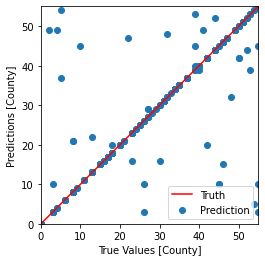

In [27]:
import matplotlib.pyplot as plt
truth_plot(truth, predic, savepath='')

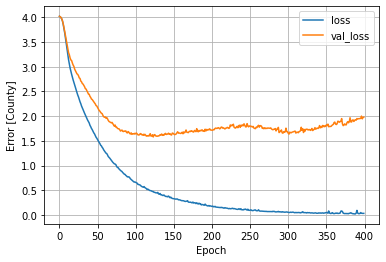

In [28]:
plot_loss(history)

In [ ]:
plot_error(truth, predic, savepath='')

In [ ]:
model.save('/Users/Rachel/Desktop/class/Projects/model')